In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from templates import *
from templates_cls import *
from experiment_classifier import ClsModel

C:\Users\tsj_g\2021118_yoshiike\.venv\Lib\site-packages\torchaudio\backend\utils.py:74: UserWarning: No audio backend is available.
  warnings.warn("No audio backend is available.")


In [3]:
device = 'cuda:0'
conf = ffhq256_autoenc()
# print(conf.name)
model = LitModel(conf)
state = torch.load(f'checkpoints/{conf.name}/last.ckpt', map_location='cpu')
model.load_state_dict(state['state_dict'], strict=False)
model.ema_model.eval()
model.ema_model.to(device);

Global seed set to 0


Model params: 160.69 M


In [4]:
cls_conf = ffhq256_autoenc_cls()
cls_model = ClsModel(cls_conf)
state = torch.load(f'checkpoints/{cls_conf.name}/last.ckpt',
                    map_location='cpu')
print('latent step:', state['global_step'])
cls_model.load_state_dict(state['state_dict'], strict=False)
cls_model.to(device);

Global seed set to 0


loading pretrain ... 130M
step: 1563562
loading latent stats ...
latent step: 9375


In [5]:
for i,file in enumerate(os.listdir('face_mask')):
    print(i, file)

print()
for i,file in enumerate(os.listdir('imgs_align')):
    print(i, file)

0 ookawa_angry_mask.jpg
1 ookawa_default_mask.jpg
2 ookawa_default_mask_eyebig.jpg
3 ookawa_default_mask_hair.jpg
4 ookawa_default_mask_hair2.jpg
5 ookawa_default_mask_smile.jpg
6 ookawa_default_mask_smile_eye.jpg
7 ookawa_default_shift2_mask.png
8 ookawa_default_shift_mask.png
9 yotaka_angry_mask.jpg
10 yotaka_default_mask.jpg
11 yotaka_smile_mask.jpg

0 azuki_default.png
1 ceo_default.png
2 check1.png
3 check2.png
4 danda_default.png
5 detective.png
6 detective_02.png
7 glasses.png
8 idPhoto.png
9 mio_happy.png
10 mio_shock.png
11 mio_silence.png
12 mio_u.png
13 nanko_default.png
14 ookawa_angry.png
15 ookawa_angry2.png
16 ookawa_default.png
17 ookawa_high.png
18 ookawa_regret.png
19 ookawa_smile.png
20 ookawa_surprised.png
21 pharmacist.png
22 saki.png
23 saki_glasses.png
24 sandy.png
25 takebe_default.png
26 test01.png
27 test01_02.png
28 test01_03.png
29 test01_04.png
30 test02.png
31 test02_02.png
32 test02_03.png
33 woman_default.png
34 yotaka_angry.png
35 yotaka_angry2.png
36 y

In [6]:
path_mask_base = 'mask_test'
for i,file in enumerate(os.listdir(path_mask_base)):
    print(i, file)

0 ookawa_default-ookawa_angry2
1 yotaka_default-yotaka_angry2
2 yotaka_default-yotaka_smile


In [7]:
ind_mask = 2
path_mask = None
for i,file in enumerate(os.listdir(path_mask_base)):
    if i == ind_mask:
        path_mask = f'{path_mask_base}/{file}'

for i,file in enumerate(os.listdir(path_mask)):
    print(i, file)

0 eyemouth_to.png
1 eye_to.png
2 face_to.png
3 from.png
4 mouthnose_to.png
5 mouth_to.png
6 pose_from.png
7 pose_to.png
8 to.png


In [8]:
data = ImageDataset('imgs_align', image_size=conf.img_size, exts=['jpg', 'JPG', 'png'], do_augment=False)
batch = torch.stack([
    data[25]['img'],
])

data2 = ImageDataset('face_mask', image_size=conf.img_size, exts=['jpg', 'JPG', 'png'], do_augment=False)
batch2 = torch.stack([
    data2[8]['img'],
    data2[7]['img']
])

batch3 = torch.stack([
    data[38]['img'],
    data[40]['img']
])

data_mask = ImageDataset('mask', image_size=conf.img_size, exts=['jpg', 'JPG', 'png'], do_augment=False)
batch_mask = torch.stack([
    data_mask[0]['img'],
    data_mask[1]['img']
])
batch_mask = batch_mask.to(device)

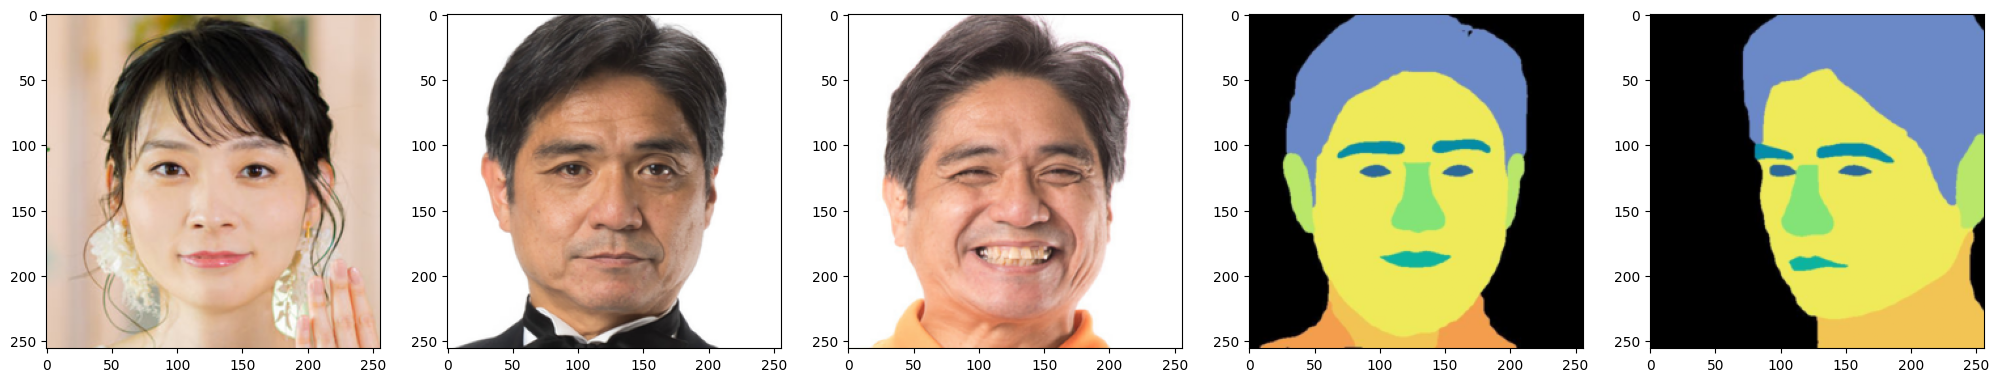

In [9]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 5, figsize=(25, 5))
ax[0].imshow(batch[0].permute([1, 2, 0]) / 2 + 0.5)
ax[1].imshow(batch3[0].permute([1, 2, 0]) / 2 + 0.5)
ax[2].imshow(batch3[1].permute([1, 2, 0]) / 2 + 0.5)
ax[3].imshow(batch2[0].permute([1, 2, 0]) / 2 + 0.5)
ax[4].imshow(batch2[1].permute([1, 2, 0]) / 2 + 0.5)
plt.show()

## mask処理

In [34]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize(256),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

In [35]:
import cv2

mask_path = 'face_mask2'
masks = []
for file in os.listdir(mask_path):
    mask = cv2.imread(f'{mask_path}/{file}')
    mask = cv2.cvtColor(mask, cv2.COLOR_BGR2RGB)
    masks.append(mask)

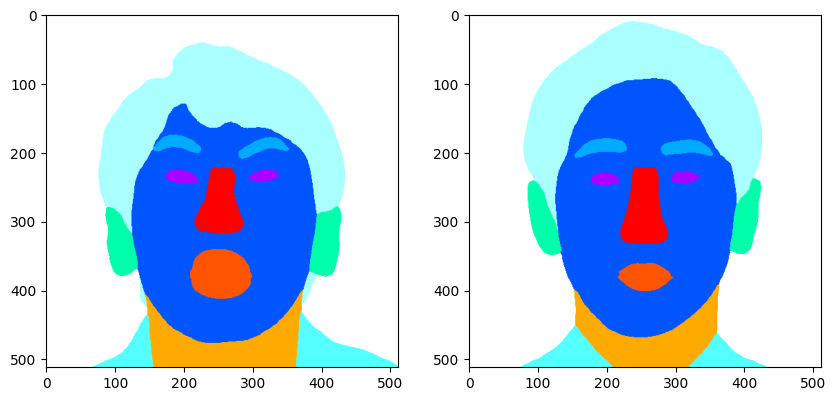

In [36]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(masks[0])
ax[1].imshow(masks[1])

plt.show()

In [37]:
t1 = masks[0].copy()
for i in range(len(t1[0])):
    for j in range(len(t1[1])):
        if np.all(t1[i][j] == [255, 0, 170]) or np.all(t1[i][j] == [255, 85, 0]):
            t1[i][j] = [255, 0, 85]

In [161]:
t2 = masks[1].copy()
for i in range(len(t2[0])):
    for j in range(len(t2[1])):
        if np.all(t2[i][j] == [255, 0, 170]) or np.all(t2[i][j] == [255, 85, 0]):
            t2[i][j] = [255, 0, 85]

In [185]:
t3 = masks[2].copy()
for i in range(len(t2[0])):
    for j in range(len(t2[1])):
        if np.all(t3[i][j] == [255, 0, 170]) or np.all(t3[i][j] == [255, 85, 0]) or np.all(t3[i][j] == [255, 0, 85]):
            t3[i][j] = [0, 85, 255]
        if np.all(masks[0][i][j] == [255, 0, 170]):
            t3[i][j] = [255, 0, 170]
        if np.all(masks[0][i][j] == [255, 85, 0]):
            t3[i][j] = [255, 85, 0]
        if np.all(masks[0][i][j] == [255, 0, 85]):
            t3[i][j] = [255, 0, 85]

In [193]:
t4 = masks[2].copy()
for i in range(len(t4[0])):
    for j in range(len(t4[1])):
        if np.all(t4[i][j] == [255, 0, 170]) or np.all(t4[i][j] == [255, 85, 0]):
            t4[i][j] = [255, 0, 85]

In [194]:
t5 = t3.copy()
for i in range(len(t3[0])):
    for j in range(len(t3[1])):
        if np.all(t3[i][j] == [255, 0, 170]) or np.all(t3[i][j] == [255, 85, 0]):
            t5[i][j] = [255, 0, 85]

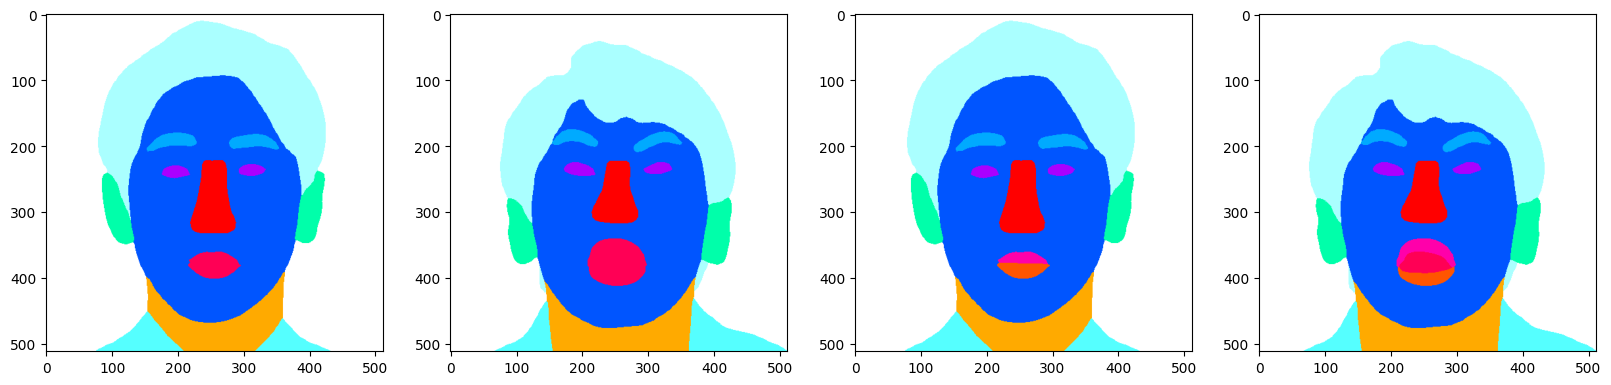

In [195]:
fig, ax = plt.subplots(1, 4, figsize=(20, 5))
ax[0].imshow(t2)
ax[1].imshow(t1)
ax[2].imshow(masks[1])
ax[3].imshow(masks[0])
plt.show()

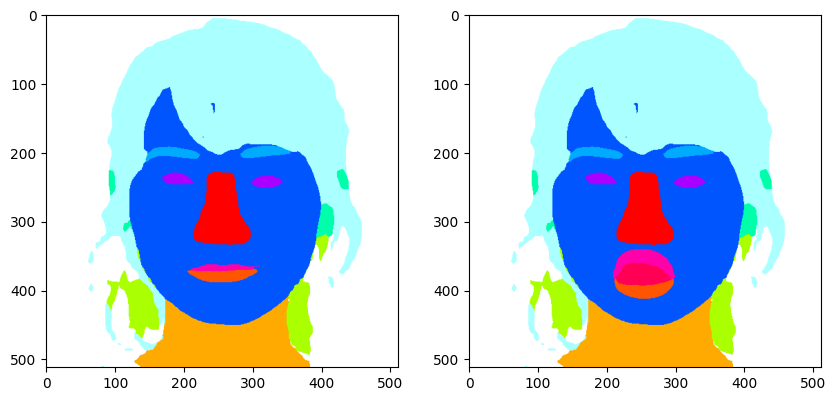

In [196]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(masks[2])
ax[1].imshow(t3)
plt.show()

In [197]:
batch5 = torch.stack([
    transform(t2),
    transform(t1)
])

In [198]:
batch4 = torch.stack([batch4[0], transform(t3)])
batch6 = torch.stack([transform(t4), transform(t5)])

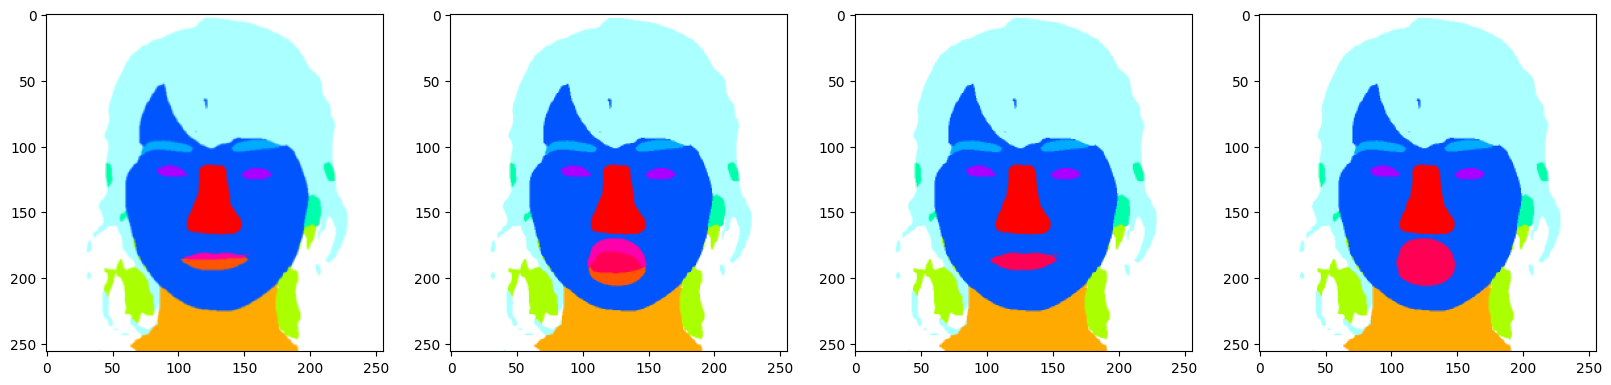

In [199]:
fig, ax = plt.subplots(1, 4, figsize=(20, 5))
ax[0].imshow((batch4[0].permute(1, 2, 0).cpu()+1)/2)
ax[1].imshow((batch4[1].permute(1, 2, 0).cpu()+1)/2)
ax[2].imshow((batch6[0].permute(1, 2, 0).cpu()+1)/2)
ax[3].imshow((batch6[1].permute(1, 2, 0).cpu()+1)/2)
plt.show()

In [200]:
# bgr
color_parts = [[255, 85, 0],  #1 skin
               [255, 170, 0],  #2 l_brow
               [255, 170, 0],  #3 r_brow
               [255, 0, 170],  #4 l_eye
               [255, 0, 170],  #5 r_eye
               [85, 255, 0],  #6 eye_g
               [170, 255, 0],  #7 l_ear
               [170, 255, 0],  #8 r_ear
               [0, 255, 170],  #9 ear_r
               [0, 0, 255],  #10 nose
               [85, 0, 255],  #11 mouth
               [170, 0, 255],  #12 u_lip
               [0, 85, 255],  #13 l_lip
               [0, 170, 255],  #14 neck
               [255, 255, 0],  #15 neck_l
               [255, 255, 85],  #16 cloth
               [255, 255, 170], #17 hair
               [255, 0, 255]]  #18 hat

# Encode

In [ ]:
cond_to = model.encode(batch.to(device))
cond_from = model.encode(batch3.to(device))
# cond_mask = model.encode(batch2.to(device))
# cond_mask_to = model.encode(batch4.to(device))  # 多色
# cond_mask_to2 = model.encode(batch6.to(device)) # 1色
# cond_mask2 = model.encode(batch5.to(device))  # 1色

xT = model.encode_stochastic(batch.to(device), cond_to, T=250)

In [ ]:
cond_to.shape

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


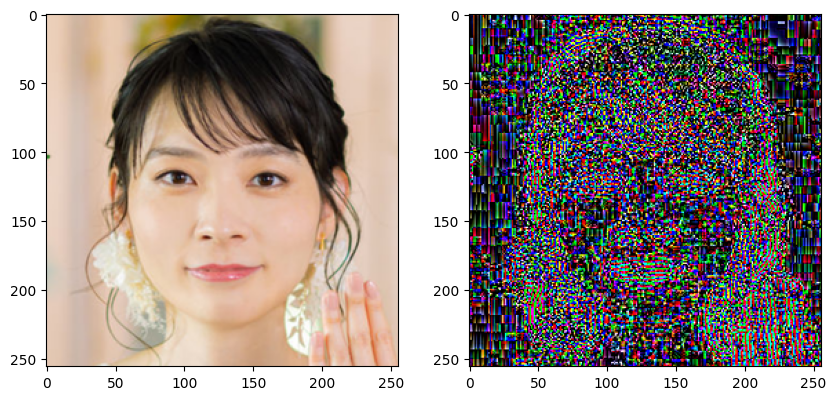

In [86]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ori = (batch + 1) / 2
ax[0].imshow(ori[0].permute(1, 2, 0).cpu())
ax[1].imshow(xT[0].permute(1, 2, 0).cpu())

In [87]:
import cv2

takebe_origin = cv2.cvtColor(cv2.imread('imgs_align/takebe_default.png'), cv2.COLOR_BGR2RGB)
takebe_xT = cv2.cvtColor(cv2.imread('takebe_xT.png'), cv2.COLOR_BGR2RGB)
takebe_mask = cv2.imread('mask/takebe_mask.png')

In [88]:
takebe_mask_reverse = takebe_mask.copy()
for i in range(len(takebe_mask_reverse[0])):
    for j in range(len(takebe_mask_reverse[1])):
        if np.all(takebe_mask_reverse[i,j] == [0, 0, 0]):
            takebe_mask_reverse[i,j] = [255, 255, 255]
        elif np.all(takebe_mask_reverse[i,j] == [255, 255, 255]):
            takebe_mask_reverse[i,j] = [0, 0, 0]

In [105]:
takebe_crop = takebe_origin & takebe_mask_reverse
xT_crop = takebe_xT & takebe_mask
xT_new = takebe_crop | xT_crop

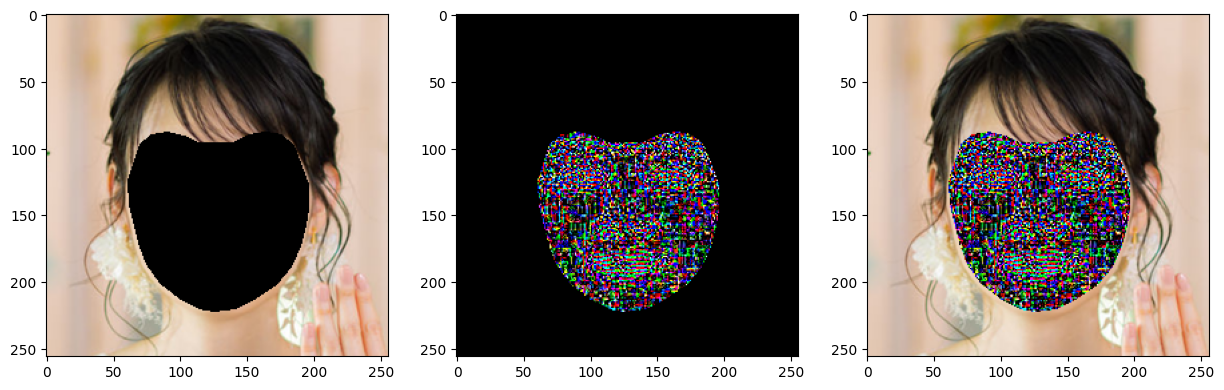

In [106]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(takebe_crop)
ax[1].imshow(xT_crop)
ax[2].imshow(xT_new)

In [107]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize(256),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

In [108]:
xT_new = transform(xT_new).to(device)

In [93]:
cond_change = (cond_from[1]-cond_from[0])[None]
# cond_change_mask = (cond_mask[1]-cond_mask[0])[None]

In [94]:
cond_test = cond_to + cond_change
# cond_test2 = cond_to + cond_change_mask
# cond_test3 = cond_to + cond_change + cond_change_mask

# Decode

In [109]:
preds = []
preds.append(model.render(xT, cond_to, T=20))
# preds.append(model.render(xT, cond_test, T=20))
# preds.append(model.render(xT, cond_test2, T=20))
# preds.append(model.render(xT, cond_test3, T=20))
preds.append(model.render(xT_new[None], cond_to, T=20))

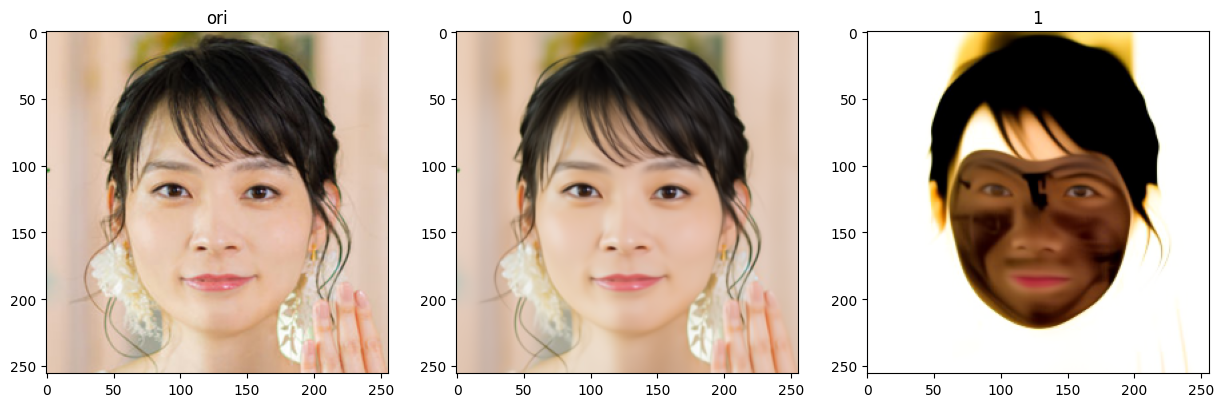

In [110]:
num = len(preds)+1
fig, ax = plt.subplots(1, num, figsize=(num*5, 5))
ori = (batch + 1) / 2
ax[0].set_title('ori')
ax[0].imshow(ori[0].permute(1, 2, 0).cpu())
for i in range(1, num): 
    ax[i].set_title(f'{i-1}')
    ax[i].imshow(preds[i-1][0].permute(1, 2, 0).cpu())

In [64]:
from torchvision.utils import save_image

dst_dir = f'results_mask_test/test'
if not os.path.exists(dst_dir):
    os.makedirs(dst_dir)
save_image(preds[1], f'{dst_dir}/test2.png', format='PNG')